In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Base (out)
eg_df = pd.read_csv("out/eg_training_metrics.csv")
gd_df = pd.read_csv("out/gd_training_metrics.csv")

# Prune (prune_out)
eg_prune_df = pd.read_csv("prune_out/eg_prune_lottery_ticket_metrics.csv")
gd_prune_df = pd.read_csv("prune_out/gd_prune_lottery_ticket_metrics.csv")
eg_sparsity_df = pd.read_csv("prune_out/eg_prune_sparsity_log.csv")
gd_sparsity_df = pd.read_csv("prune_out/gd_prune_sparsity_log.csv")


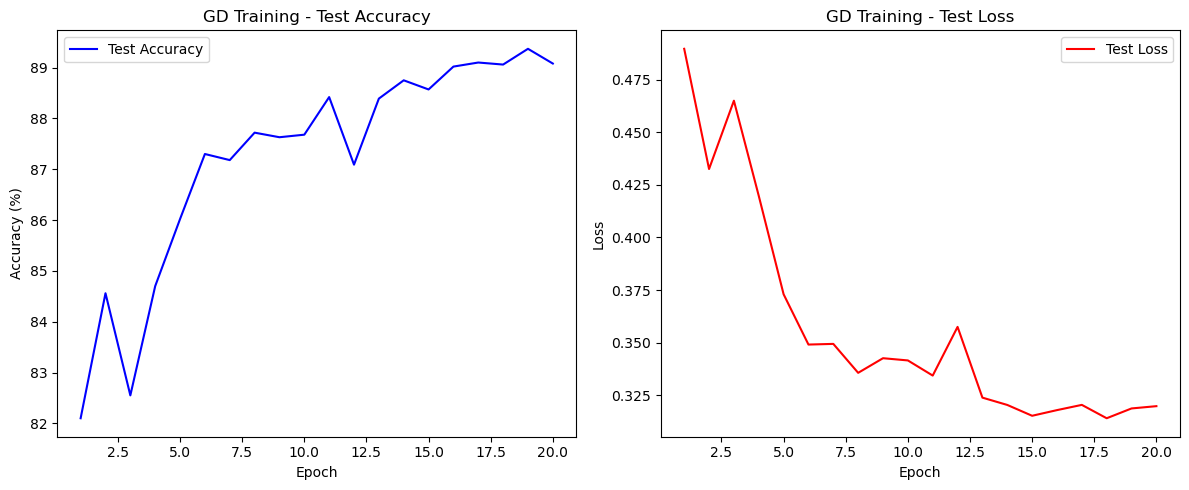

In [4]:
# GD Training: Epoch vs Test Loss & Test Accuracy
plt.figure(figsize=(12,5))

# Test Accuracy
plt.subplot(1,2,1)
plt.plot(gd_df["Epoch"], gd_df["Test Acc (%)"], label="Test Accuracy", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("GD Training - Test Accuracy")
plt.legend()

# Test Loss
plt.subplot(1,2,2)
plt.plot(gd_df["Epoch"], gd_df["Test Loss"], label="Test Loss", color="red")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("GD Training - Test Loss")
plt.legend()

plt.tight_layout()
plt.show()

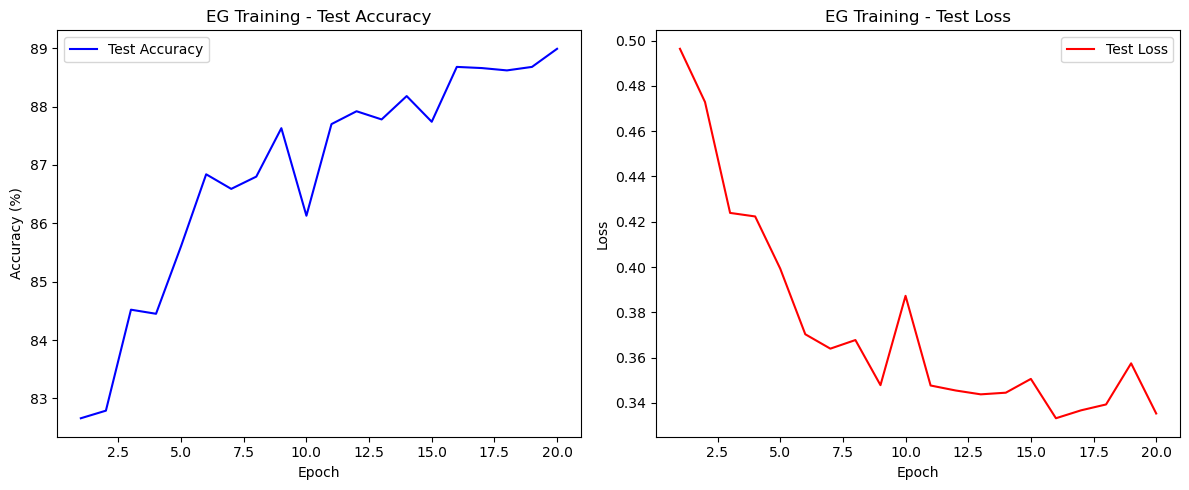

In [6]:
# EG Training: Epoch vs Test Loss & Test Accuracy
plt.figure(figsize=(12,5))

# Test Accuracy
plt.subplot(1,2,1)
plt.plot(eg_df["Epoch"], eg_df["Test Acc (%)"], label="Test Accuracy", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("EG Training - Test Accuracy")
plt.legend()

# Test Loss
plt.subplot(1,2,2)
plt.plot(eg_df["Epoch"], eg_df["Test Loss"], label="Test Loss", color="red")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("EG Training - Test Loss")
plt.legend()

plt.tight_layout()
plt.show()


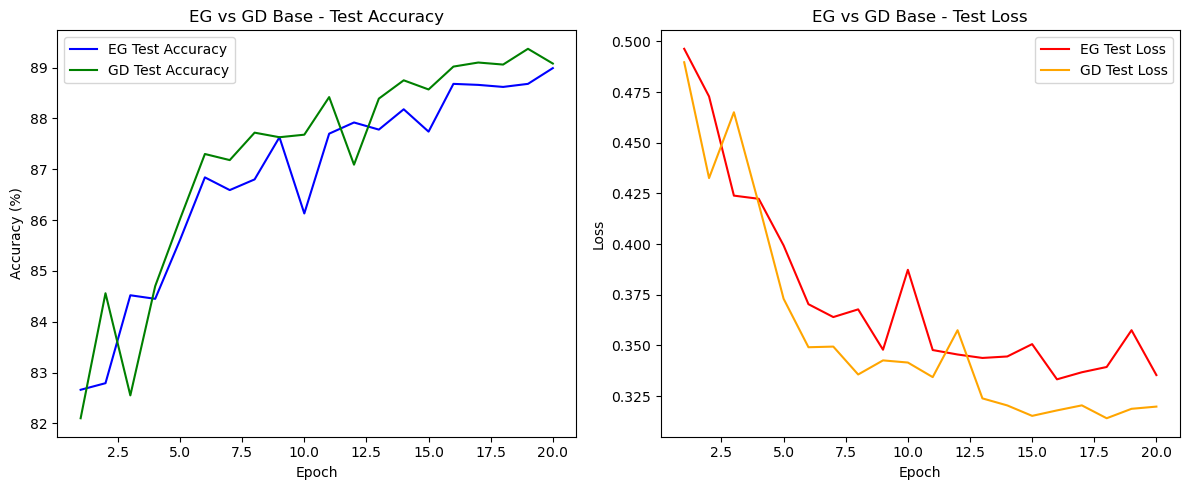

In [8]:
# Compare EG vs GD (Base Training)
plt.figure(figsize=(12,5))

# Test Accuracy
plt.subplot(1,2,1)
plt.plot(eg_df["Epoch"], eg_df["Test Acc (%)"], label="EG Test Accuracy", color="blue")
plt.plot(gd_df["Epoch"], gd_df["Test Acc (%)"], label="GD Test Accuracy", color="green")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("EG vs GD Base - Test Accuracy")
plt.legend()

# Test Loss
plt.subplot(1,2,2)
plt.plot(eg_df["Epoch"], eg_df["Test Loss"], label="EG Test Loss", color="red")
plt.plot(gd_df["Epoch"], gd_df["Test Loss"], label="GD Test Loss", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("EG vs GD Base - Test Loss")
plt.legend()

plt.tight_layout()
plt.show()


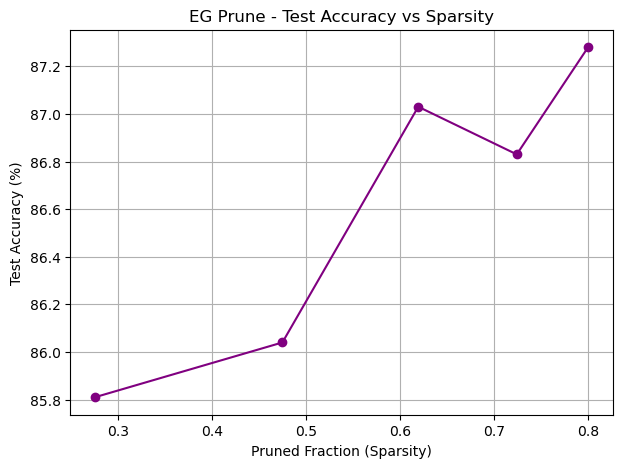

In [10]:
# Merge EG prune training metrics with sparsity log
eg_prune_merged = pd.merge(eg_prune_df, eg_sparsity_df, on="Epoch", how="inner")

# Plot Accuracy vs Sparsity
plt.figure(figsize=(7,5))
plt.plot(eg_prune_merged["Pruned Fraction"], eg_prune_merged["Test Acc (%)"], marker="o", color="purple")
plt.xlabel("Pruned Fraction (Sparsity)")
plt.ylabel("Test Accuracy (%)")
plt.title("EG Prune - Test Accuracy vs Sparsity")
plt.grid(True)
plt.show()


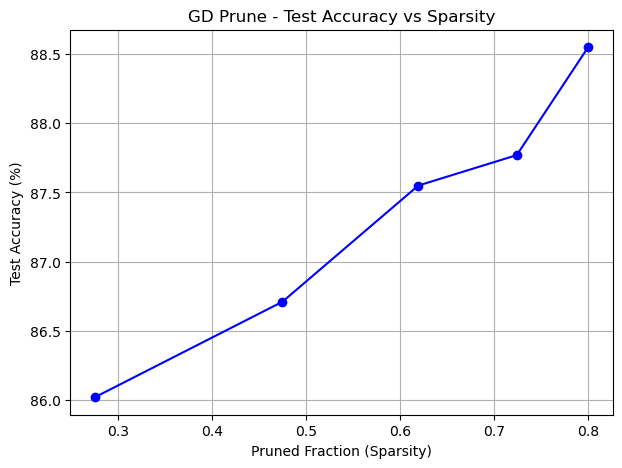

In [12]:
# Merge GD prune training metrics with sparsity log
gd_prune_merged = pd.merge(gd_prune_df, gd_sparsity_df, on="Epoch", how="inner")

# Plot Accuracy vs Sparsity
plt.figure(figsize=(7,5))
plt.plot(gd_prune_merged["Pruned Fraction"], gd_prune_merged["Test Acc (%)"], marker="o", color="blue")
plt.xlabel("Pruned Fraction (Sparsity)")
plt.ylabel("Test Accuracy (%)")
plt.title("GD Prune - Test Accuracy vs Sparsity")
plt.grid(True)
plt.show()


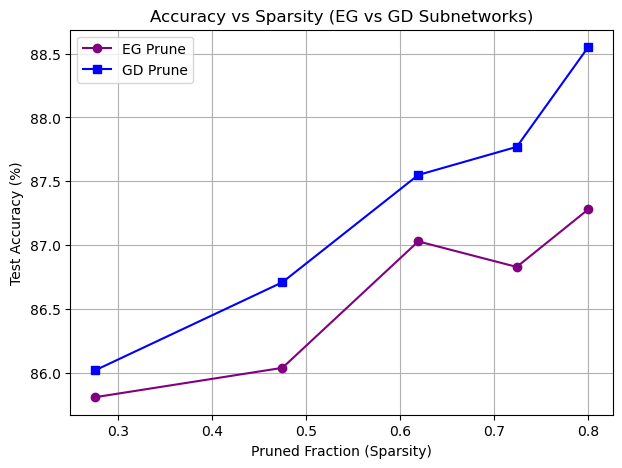

In [22]:
# Merge both prune metrics with sparsity logs
eg_prune_merged = pd.merge(eg_prune_df, eg_sparsity_df, on="Epoch", how="inner")
gd_prune_merged = pd.merge(gd_prune_df, gd_sparsity_df, on="Epoch", how="inner")

# Plot combined Accuracy vs Sparsity
plt.figure(figsize=(7,5))
plt.plot(eg_prune_merged["Pruned Fraction"], eg_prune_merged["Test Acc (%)"], 
         marker="o", color="purple", label="EG Prune")
plt.plot(gd_prune_merged["Pruned Fraction"], gd_prune_merged["Test Acc (%)"], 
         marker="s", color="blue", label="GD Prune")

plt.xlabel("Pruned Fraction (Sparsity)")
plt.ylabel("Test Accuracy (%)")
plt.title("Accuracy vs Sparsity (EG vs GD Subnetworks)")
plt.legend()
plt.grid(True)
plt.show()
